<a href="https://colab.research.google.com/github/myungseonSim/kakao-tech/blob/main/GenAi/KTB_Day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 시각화 I 실습

막대그래프, 선그래프, 히스토그램, 파이차트, 산점도, 박스플롯을 구현해봅니다.

실습에 사용하는 데이터는 https://www.kaggle.com/datasets/nikhil7280/weather-type-classification 데이터입니다.

본인이 원하는 다른 데이터가 있다면 다른 데이터를 사용하셔도 좋습니다.

데이터에서 적절한 데이터를 선정하여 각 시각화 분석에 적용합니다.

시각화를 진행할 때는 차트 뿐만 아니라 범례, 제목, 레이블, 색상, 크기 등 여러가지 요소들을 직접 개발하시면서

데이터의 특성을 잘 이해해보시면 좋을 것 같습니다.

In [1]:
!kaggle datasets download -d nikhil7280/weather-type-classification

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
  0% 0.00/186k [00:00<?, ?B/s]
100% 186k/186k [00:00<00:00, 52.8MB/s]


In [2]:
!unzip weather-type-classification.zip

Archive:  weather-type-classification.zip
  inflating: weather_classification_data.csv  


In [3]:
# 기본 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv('weather_classification_data.csv')
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [24]:
categorical_col = data.select_dtypes(include=['object']).columns
numerical_col = data.select_dtypes(include=['int64', 'float64']).columns

print(categorical_col)
print(numerical_col)

Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')
Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')


계절에 따른 강수량?


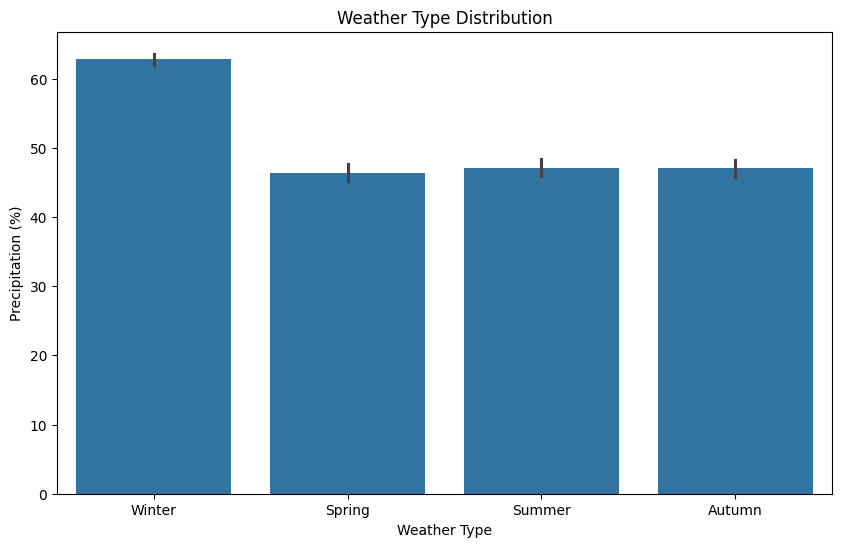

In [37]:
# 1. 막대그래프
plt.figure(figsize=(10, 6))
print("계절에 따른 강수량?")
sns.barplot(x='Season', y= 'Precipitation (%)' ,data=data)
plt.title('Weather Type Distribution')
plt.xlabel('Weather Type')
plt.ylabel('Precipitation (%)')
plt.show()

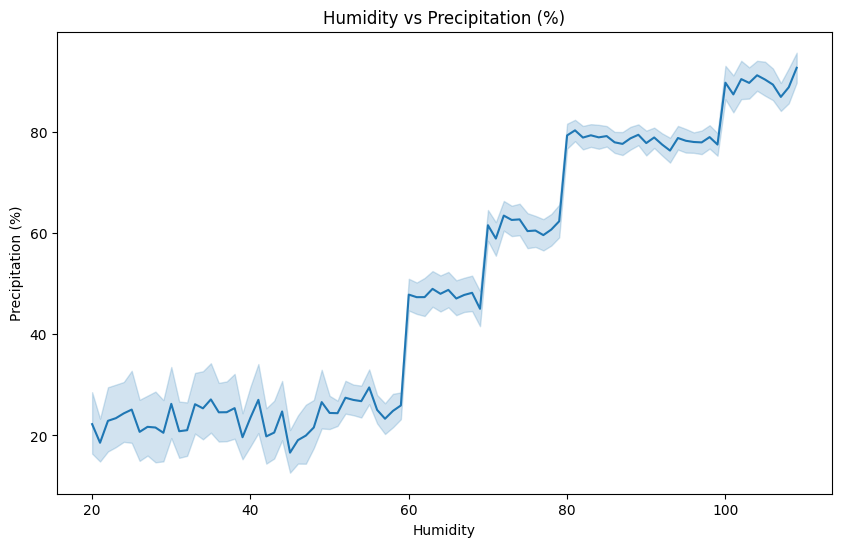

In [30]:
# 2. 선그래프
plt.figure(figsize=(10, 6))
sns.lineplot(x='Humidity', y='Precipitation (%)', data=data)
plt.title('Humidity vs Precipitation (%)')
plt.xlabel('Humidity')
plt.ylabel('Precipitation (%)')
plt.show()

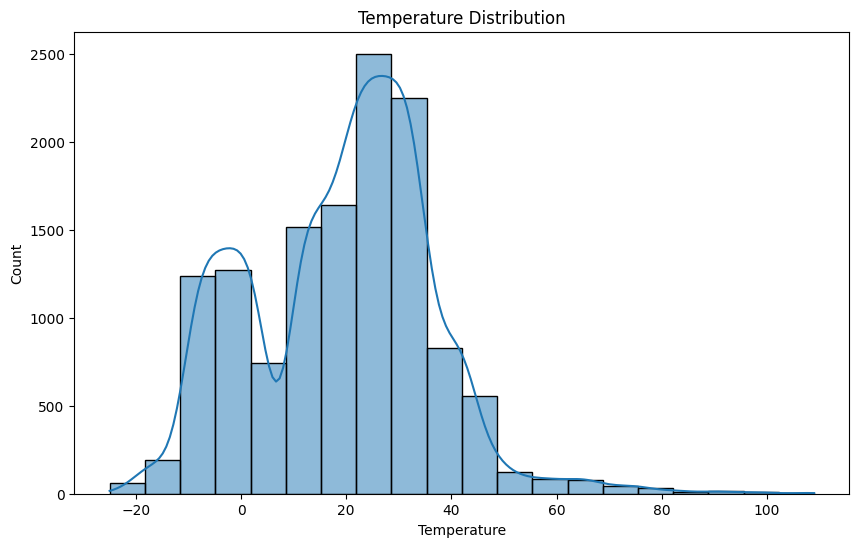

In [16]:
# 3. 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data['Temperature'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Weather Type Distribution')

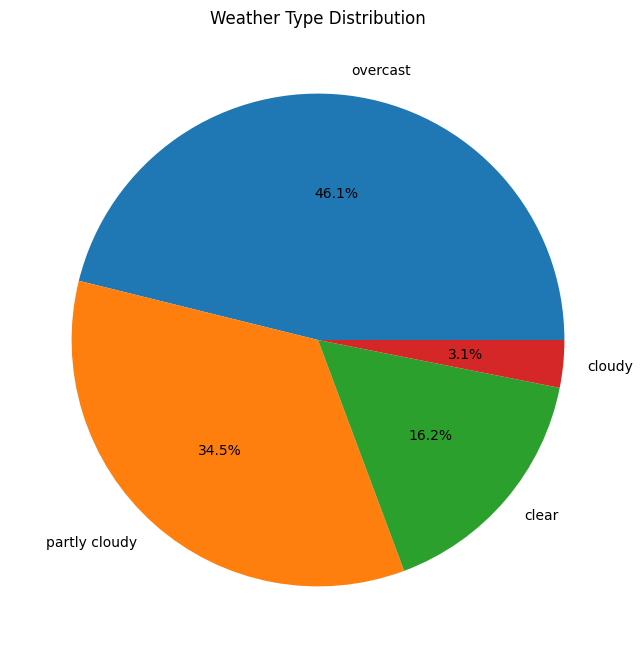

In [42]:
# 4. 파이차트
weather_counts = data['Cloud Cover'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%')
plt.title('Weather Type Distribution')

Text(0.5, 1.0, 'Weather Type Distribution')

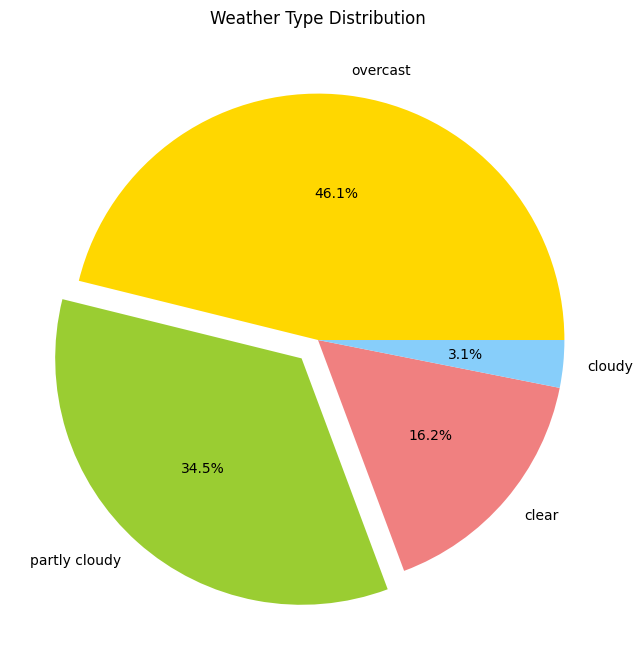

In [47]:
# 4-1 복잡한 디자인의 파이차트
explode = (0, 0.1, 0, 0)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
Cloud_Cover = data['Cloud Cover'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Cloud_Cover,explode=explode, labels=Cloud_Cover.index,colors=colors, autopct='%1.1f%%')
plt.title('Weather Type Distribution')

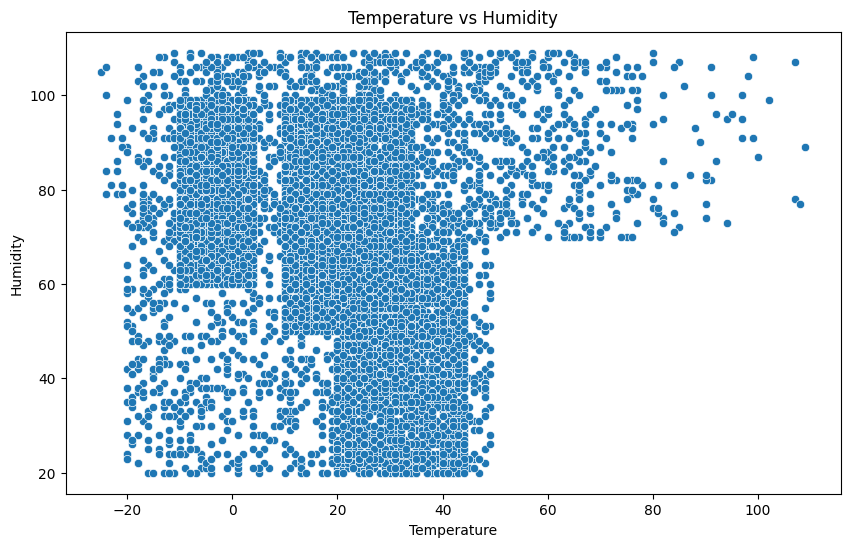

In [18]:
# 5. 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=data)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

Text(0, 0.5, 'Wind Speed')

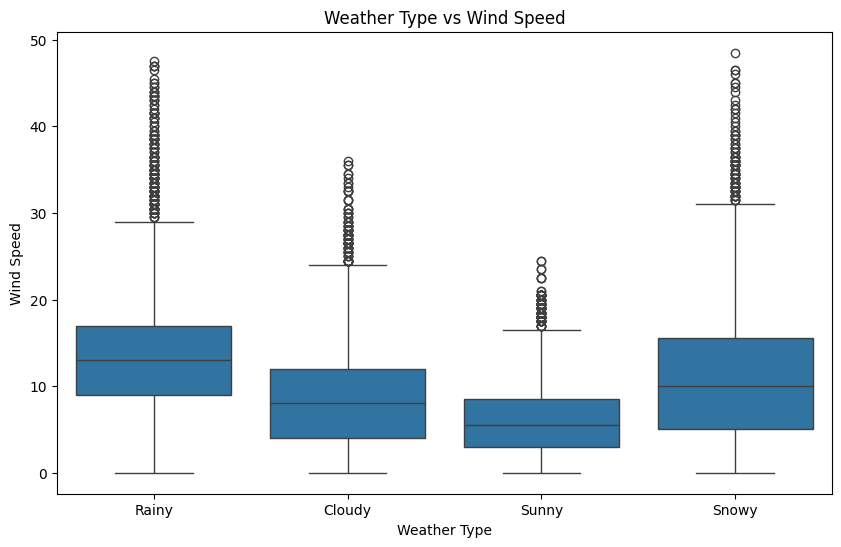

In [20]:
# 6. 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather Type', y='Wind Speed', data=data)
plt.title('Weather Type vs Wind Speed')
plt.xlabel('Weather Type')
plt.ylabel('Wind Speed')


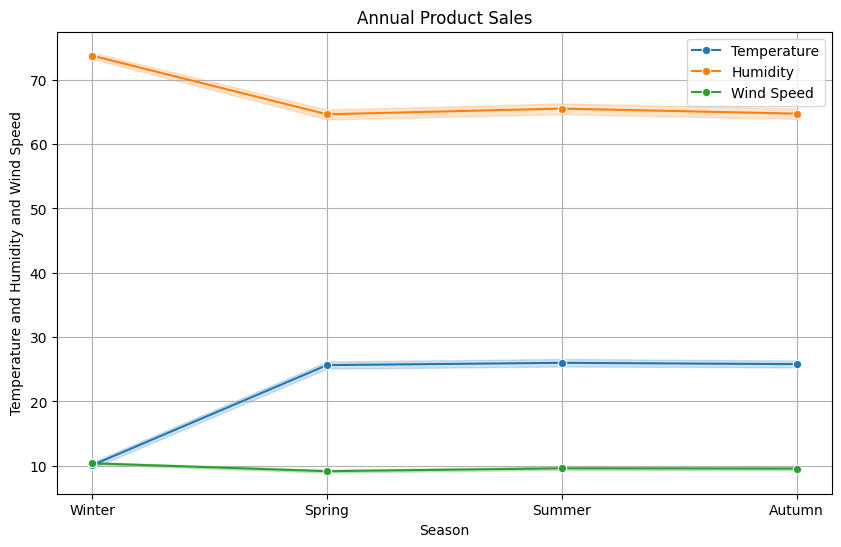

In [49]:
# 7. 여러 시각화 차트 합쳐보기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.lineplot(x='Season', y='Temperature', data=data, marker='o', label='Temperature')
sns.lineplot(x='Season', y='Humidity', data=data, marker='o', label='Humidity')
sns.lineplot(x='Season', y='Wind Speed', data=data, marker='o', label='Wind Speed')
plt.title('Annual Product Sales')  # 제목 추가
plt.xlabel('Season')  # x축 레이블 추가
plt.ylabel('Temperature and Humidity and Wind Speed')  # y축 레이블 추가
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 추가
plt.show()